<a href="https://colab.research.google.com/github/anikashaji/CODSOFT/blob/main/Movie_Rating_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA LOADING**

In [1]:
import pandas as pd
df = pd.read_csv('IMDb Movies India.csv',encoding='ISO-8859-1')

In [2]:
df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid


In [3]:
df.shape

(15509, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


**CHECKING FOR NULLS**

In [5]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


**CHECKING DATATYPES**

In [6]:
df.dtypes

,0
Name,object
Year,object
Duration,object
Genre,object
Rating,float64
Votes,object
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


# **PREPROCESSING-DATA CLEANING**

**HANDLING NULLS**

In [7]:
df['Year'] = df['Year'].str.extract('(\d{4})')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce')
df['Year'] = df['Year'].fillna(pd.to_datetime(df['Year'].median(), format='%Y'))

In [8]:
from sklearn.impute import SimpleImputer
df['Duration'] = df['Duration'].str.replace(' min', '', regex=False)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
imputer = SimpleImputer(strategy='median')
df['Duration'] = imputer.fit_transform(df[['Duration']])

In [9]:
df['Genre'] = df['Genre'].fillna('Unknown')

In [10]:
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''), errors='coerce')
df['Votes'] = df['Votes'].fillna(df['Votes'].median())

In [11]:
df = df.drop(columns=['Actor 1',
       'Actor 2', 'Actor 3'])
df = df.drop(columns=['Name'])
df = df.drop(columns=['Director'])

In [12]:
df.dtypes

,0
Year,datetime64[ns]
Duration,float64
Genre,object
Rating,float64
Votes,float64


In [13]:
df.columns

Index(['Year', 'Duration', 'Genre', 'Rating', 'Votes'], dtype='object')

**HANDLING NULLS IN TARGET VARIABLES**




In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['Rating'] = imputer.fit_transform(df[['Rating']])

In [15]:
X = df[['Duration', 'Genre','Votes']]
y = df['Rating']

**CHECKING FOR DUPLICATES - AND HANDLING**

In [16]:
dup_data = df.duplicated().sum()
dup_data
df = df.drop_duplicates()
df

,Year,Duration,Genre,Rating,Votes
0,1991-01-01,131.0,Drama,5.841621,55.0
1,2019-01-01,109.0,Drama,7.000000,8.0
2,2021-01-01,90.0,"Drama, Musical",5.841621,55.0
3,2019-01-01,110.0,"Comedy, Romance",4.400000,35.0
4,2010-01-01,105.0,Drama,5.841621,55.0
...,...,...,...,...,...
15501,1992-01-01,131.0,"Action, Crime, Drama",5.300000,135.0
15503,1989-01-01,125.0,"Action, Crime, Drama",5.800000,44.0
15504,1988-01-01,131.0,Action,4.600000,11.0
15505,1999-01-01,129.0,"Action, Drama",4.500000,655.0


# **OUTLIER ANALYSIS**

**BOXPLOT FOR RATINGS**

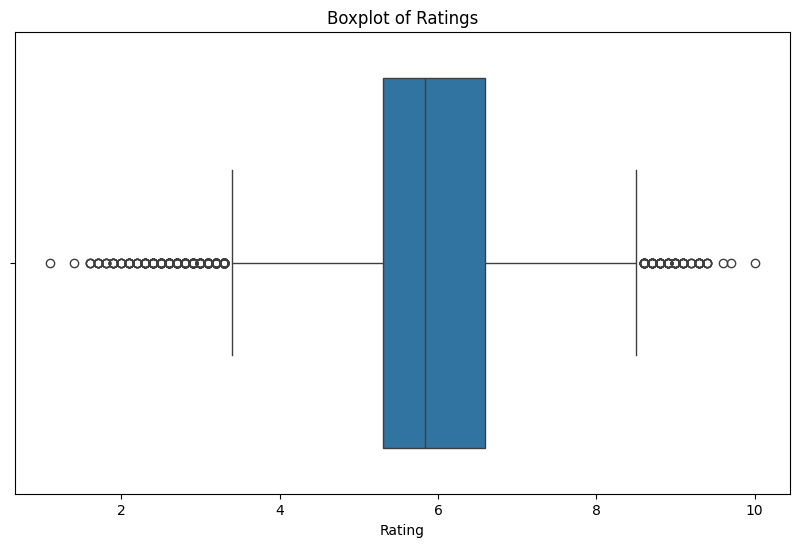

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Rating'])
plt.title('Boxplot of Ratings')
plt.show()

**BOXPLOT FOR DURATION**

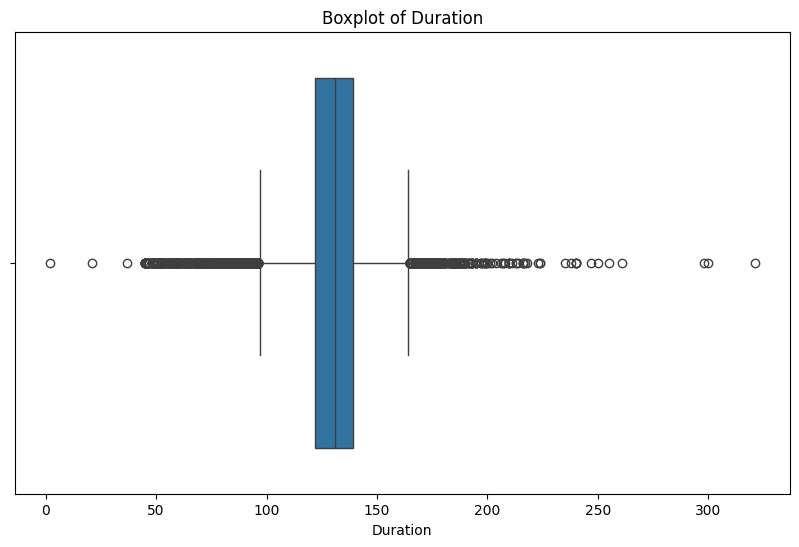

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Duration'])
plt.title('Boxplot of Duration')
plt.show()



**BOXPLOT FOR VOTES**

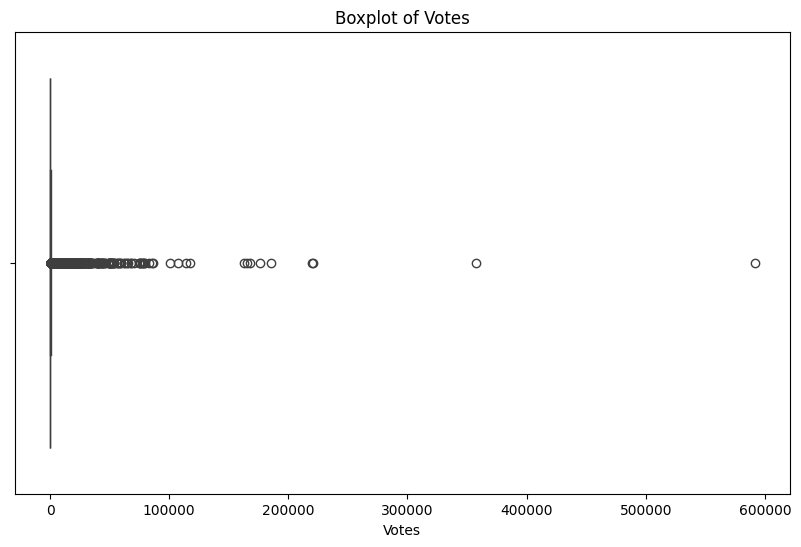

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Votes'])
plt.title('Boxplot of Votes')
plt.show()

# **EXPLORATORY DATA ANALYSIS**

**UNIVARIATE ANALYSIS - RATING DISTRIBUTION**

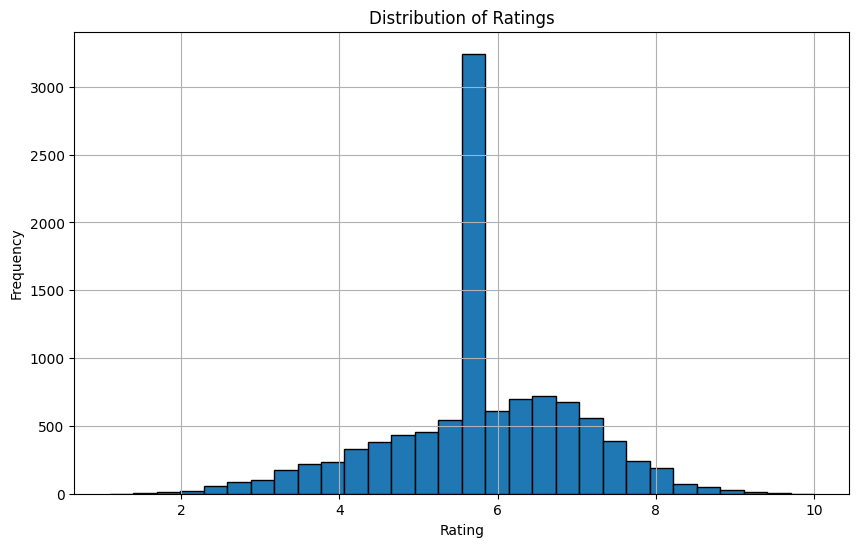

In [20]:
# Rating Distribution
plt.figure(figsize=(10, 6))
df['Rating'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


**TOP 10 CATEGORIES ACCORDING TO RATING**

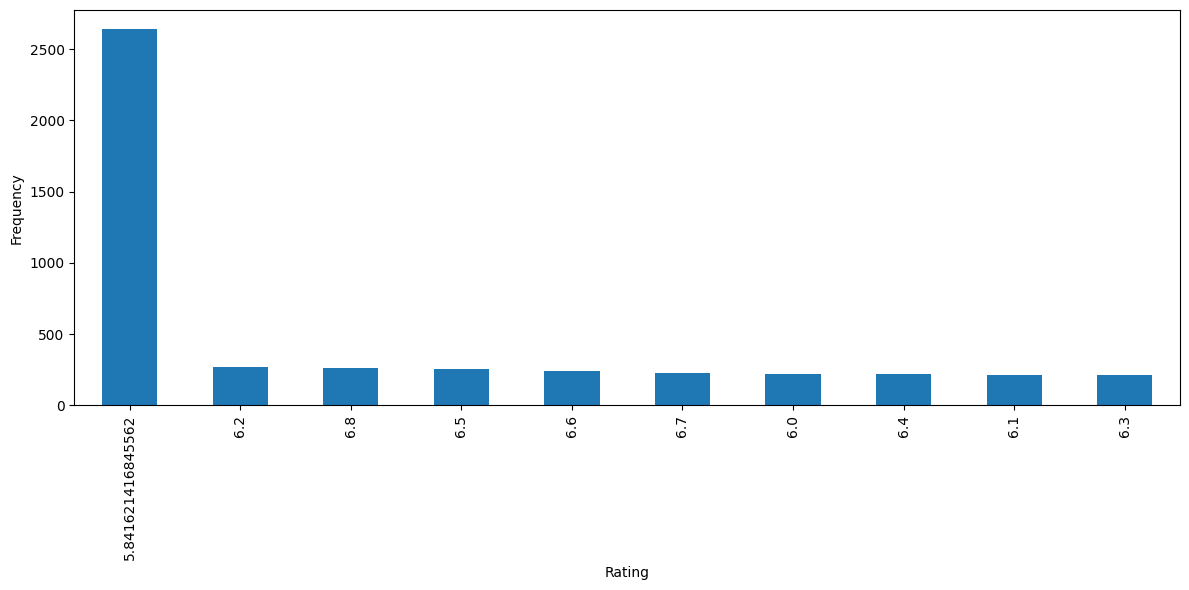

In [21]:
import matplotlib.pyplot as plt

top_n = 10  # Number of top categories to display
top_ratings = df['Rating'].value_counts().head(top_n)

plt.figure(figsize=(12, 6))
top_ratings.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


**TOP GENRES ACCORDING TO RATING**

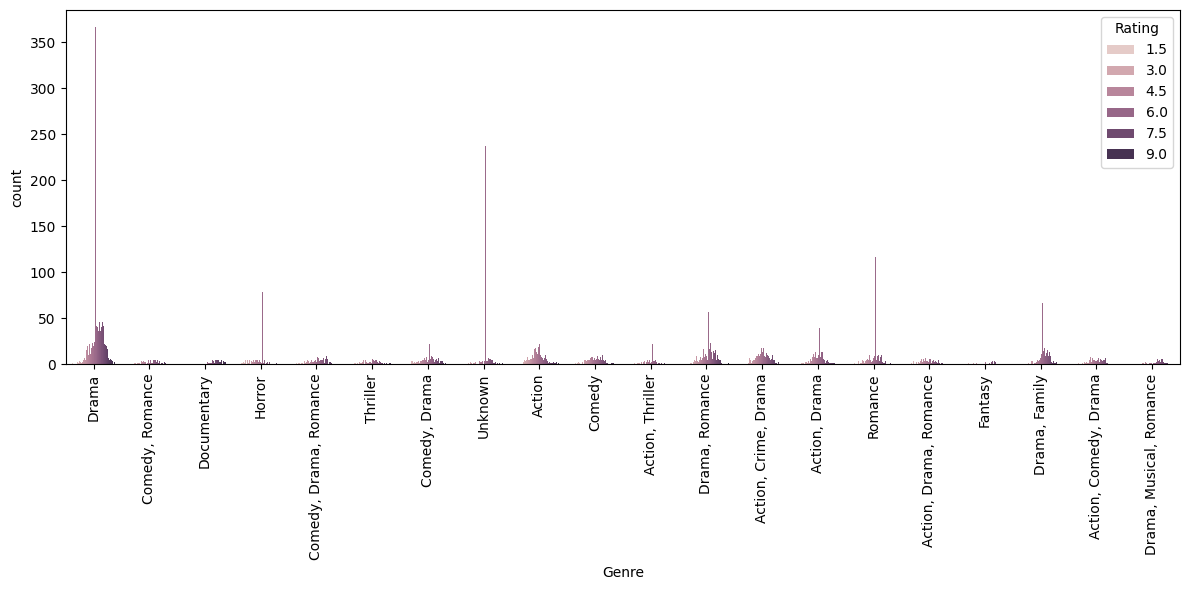

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top N genres
top_n = 20
top_genres = df['Genre'].value_counts().nlargest(top_n).index

# Filter the DataFrame to include only the top N genres
filtered_df = df[df['Genre'].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.countplot(x=filtered_df['Genre'], hue=filtered_df['Rating'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**BIVARIATE ANALYSIS**

**AVERAGE RATING OVER YEARS**

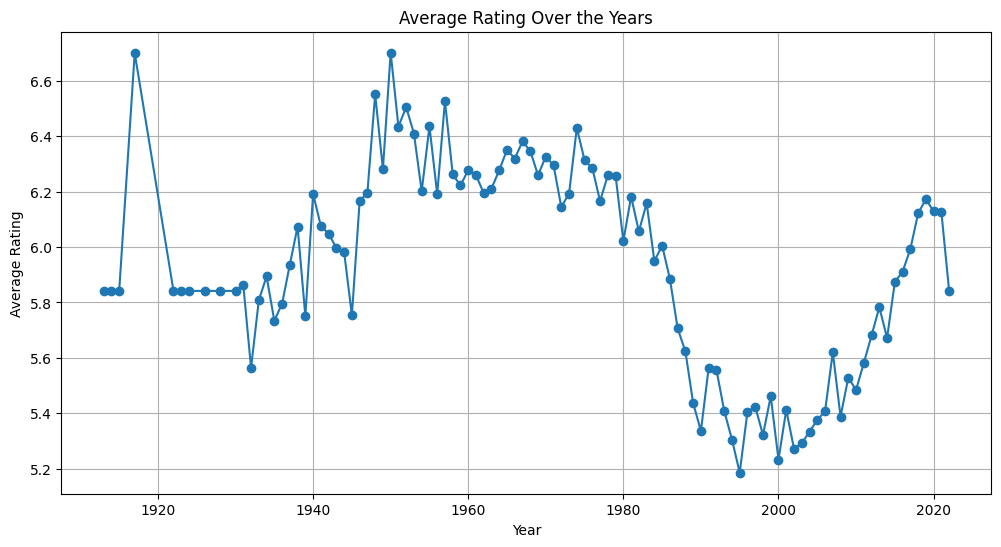

In [23]:
# Convert Year to datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce').dt.year

# Average Rating Over Years
average_rating_per_year = df.groupby('Year')['Rating'].mean()
plt.figure(figsize=(12, 6))
average_rating_per_year.plot(kind='line', marker='o')
plt.title('Average Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid()
plt.show()

**NUMBER OF MOVIES OVER TIME**

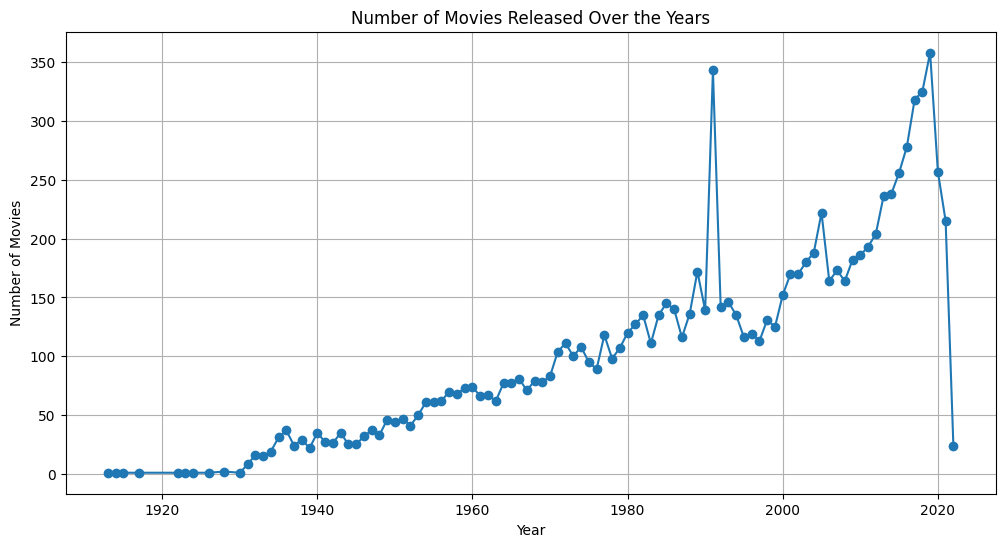

In [24]:
# Number of Movies Over Years
movies_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='line', marker='o')
plt.title('Number of Movies Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid()
plt.show()

In [25]:
# One-hot encoding for Genre
genre_dummies = df['Genre'].str.get_dummies(sep=', ')

**SPLITTING THE DATA**

In [30]:
X = pd.concat([genre_dummies, df[['Votes', 'Duration']]], axis=1)
y= df['Rating']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


# **MODEL TRAINING AND PREDICTION**

**RANDOM FOREST REGRESSOR MODEL**

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 1.1448480443643674


**LINEAR REGRESSION MODEL**

In [36]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(X_train, y_train)
y_pred = lrm.predict(X_test)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse2}')

Root Mean Squared Error: 1.1380323014473621


**DECISION TREE REGRESSOR MODEL**

In [37]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
rmse3 = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse3}')

Root Mean Squared Error: 1.4632154508680575


**GRADIENT BOOSTING REGRESSOR MODEL**

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
rmse4 = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse4}')

Root Mean Squared Error: 1.081454874546363


**SUPPORT VECTOR REGRESSOR MODEL**

In [44]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
rmse5 = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse5}')

Root Mean Squared Error: 1.1717658905904456


**INTERPRETATION - GRADIENT BOOSTING REGRESSOR MODEL HAS THE LEAST VALUE OF ROOT MEAN SQUARED ERROR OF 1.0814, SHOWING THE MOST ACCURATE PREDICTION**